## 가설1. 특정 시간대 별 범죄 발생 가능성을 예측할 수 있는가? (범죄유형이 다르게 나타남)

In [19]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
chicago = pd.read_csv('/content/drive/MyDrive/final_csv/최종데이터/최종데이터/chicago_crime_final.csv')

In [5]:
chicago.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,geometry,Community Area Name,F_Date,Time
0,6255892,HP342049,2008-05-17 18:00:00,101XX S LAFAYETTE AVE,031A,ROBBERY,ARMED - HANDGUN,RESIDENCE,False,False,...,1837726.0,2008,01/19/2024 03:40:50 PM,41.710040,-87.624796,"(41.710039855, -87.62479561)",POINT (-87.62479561 41.710039855),Roseland,2008-05-17,18:00:00
1,6272641,HP358387,2008-05-27 01:00:00,105XX S PERRY AVE,0320,ROBBERY,STRONG ARM - NO WEAPON,STREET,False,True,...,1835161.0,2008,01/19/2024 03:40:50 PM,41.703007,-87.625785,"(41.703006756, -87.625784664)",POINT (-87.625784664 41.703006756),Roseland,2008-05-27,01:00:00
2,6438609,HP496499,2008-08-05 22:37:00,126XX S UNION AVE,031A,ROBBERY,ARMED - HANDGUN,SCHOOL - PUBLIC GROUNDS,False,False,...,1821073.0,2008,01/19/2024 03:40:50 PM,41.664425,-87.639053,"(41.664425476, -87.639053139)",POINT (-87.639053139 41.664425476),West Pullman,2008-08-05,22:37:00
3,6680276,HP754070,2008-12-27 20:00:00,058XX N MANTON AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE - GARAGE,False,False,...,1938474.0,2008,01/19/2024 03:40:50 PM,41.987326,-87.770650,"(41.9873259, -87.770650405)",POINT (-87.770650405 41.9873259),Jefferson Park,2008-12-27,20:00:00
4,12536164,JE439378,2015-09-24 00:00:00,031XX W 53RD PL,1753,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,APARTMENT,False,True,...,1868986.0,2015,09/14/2023 03:41:59 PM,41.796278,-87.702253,"(41.796278388, -87.702253422)",POINT (-87.702253422 41.796278388),Gage Park,2015-09-24,00:00:00


In [64]:
# 시간 추출
chicago['Time'] = pd.to_datetime(chicago['Time'], errors='coerce')
chicago['Hour'] = chicago['Time'].dt.hour

# 시간대 범주 만들기
bins = [0, 6, 12, 18, 24]
labels = ['Night (0-6)', 'Morning (6-12)', 'Afternoon (12-18)', 'Evening (18-24)']
chicago['Time Slot'] = pd.cut(chicago['Hour'], bins=bins, labels=labels, right=False)

# 교차표 만들기 (범죄유형 vs 시간대)
cross_tab = pd.crosstab(chicago['Time Slot'], chicago['Primary Type'])
display(cross_tab)

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Time Slot,,,,,,,,,,,,,,,,,,,,,
Night (0-6),6147,66216,325817,73254,355,10826,216303,4417,28962,64076,...,72659,10891,29,6726,5,73912,7583,940,238858,24505
Morning (6-12),2014,117702,254192,133562,322,3771,164295,1339,47617,109098,...,130638,17363,59,8794,1,45050,7374,1521,389205,14777
Afternoon (12-18),1981,199227,438132,129314,340,5102,228246,1821,71432,148284,...,163631,6518,80,18331,11,82257,10442,1860,644839,28386
Evening (18-24),4039,167798,490330,103378,471,7633,332721,2735,75488,56599,...,148437,35516,46,20258,7,109692,7936,1472,481184,53820


In [65]:
from scipy.stats import chi2_contingency

# 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi-squared statistic:", chi2) # 카이제곱 통계량
print("p-value:", p) # p-value / <0.05면 귀무가설 기각 (가설확인)
print("Degrees of freedom:", dof) # 자유도

Chi-squared statistic: 401824.3136926906
p-value: 0.0
Degrees of freedom: 105


In [66]:
import numpy as np

# 총 관측치 수
n = cross_tab.values.sum()

# Cramér's V 계산
min_dim = min(cross_tab.shape) - 1  # 자유도 중 최소 차원
cramers_v = np.sqrt(chi2 / (n * min_dim))

# 출력
print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.1272


In [56]:
# 귀무가설이 참일 때 기대되는 빈도
expected_df = pd.DataFrame(expected, index=cross_tab.index, columns=cross_tab.columns)
display(expected_df)

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Time Slot,,,,,,,,,,,,,,,,,,,,,
Night (0-6),2401.339201,93293.916056,255436.890652,74424.073739,251.970434,4628.263384,159439.880480,1746.182205,37846.196330,64018.270533,...,87269.316514,11902.216330,36.237683,9162.545860,4.064039,52648.104677,5644.781206,980.957478,297028.099166,20572.166765
Morning (6-12),2877.308197,111785.685764,306066.989125,89175.655519,301.913447,5545.630607,191042.429464,2092.292654,45347.683848,76707.320000,...,104566.951470,14261.352410,43.420348,10978.652367,4.869572,63083.475689,6763.632236,1175.392877,355901.983324,24649.772104
Afternoon (12-18),4400.675582,170969.706462,468111.663232,136388.979890,461.759063,8481.719555,292188.287472,3200.039955,69356.645650,117319.385700,...,159929.072101,21811.909268,66.408897,16791.210428,7.447727,96482.508001,10344.582225,1797.695060,544331.389143,37700.393142
Evening (18-24),4501.677020,174893.691719,478855.456991,139519.290852,472.357056,8676.386454,298894.402585,3273.485186,70948.474172,120012.023767,...,163599.659915,22312.521991,67.933071,17176.591345,7.618662,98696.911633,10582.004333,1838.954585,556824.528367,38565.667990


In [58]:
residual = cross_tab - expected

In [59]:
residual

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Time Slot,,,,,,,,,,,,,,,,,,,,,
Night (0-6),3745.660799,-27077.916056,70380.109348,-1170.073739,103.029566,6197.736616,56863.119520,2670.817795,-8884.196330,57.729467,...,-14610.316514,-1011.216330,-7.237683,-2436.545860,0.935961,21263.895323,1938.218794,-40.957478,-58170.099166,3932.833235
Morning (6-12),-863.308197,5916.314236,-51874.989125,44386.344481,20.086553,-1774.630607,-26747.429464,-753.292654,2269.316152,32390.680000,...,26071.048530,3101.647590,15.579652,-2184.652367,-3.869572,-18033.475689,610.367764,345.607123,33303.016676,-9872.772104
Afternoon (12-18),-2419.675582,28257.293538,-29979.663232,-7074.979890,-121.759063,-3379.719555,-63942.287472,-1379.039955,2075.354350,30964.614300,...,3701.927899,-15293.909268,13.591103,1539.789572,3.552273,-14225.508001,97.417775,62.304940,100507.610857,-9314.393142
Evening (18-24),-462.677020,-7095.691719,11474.543009,-36141.290852,-1.357056,-1043.386454,33826.597415,-538.485186,4539.525828,-63413.023767,...,-15162.659915,13203.478009,-21.933071,3081.408655,-0.618662,10995.088367,-2646.004333,-366.954585,-75640.528367,15254.332010


 - 정규화 잔차

In [60]:
import numpy as np
standardized_residual = (cross_tab - expected) / np.sqrt(expected)
standardized_residual

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Time Slot,,,,,,,,,,,,,,,,,,,,,
Night (0-6),76.436658,-88.652008,139.254144,-4.289005,6.490633,91.101197,142.407283,63.914513,-45.667478,0.228163,...,-49.457122,-9.268942,-1.202318,-25.454614,0.464279,92.672623,25.797596,-1.307700,-106.733570,27.419878
Morning (6-12),-16.094322,17.695308,-93.766946,148.636758,1.156017,-23.830464,-61.195168,-16.468442,10.656570,116.950386,...,80.623431,25.972401,2.364346,-20.850085,-1.753547,-71.799535,7.421669,10.080711,55.823668,-62.882914
Afternoon (12-18),-36.475182,68.339371,-43.817946,-19.157356,-5.666222,-36.697689,-118.292379,-24.378060,7.880399,90.402572,...,9.256872,-103.555142,1.667791,11.882843,1.301651,-45.797681,0.957815,1.469483,136.228276,-47.971315
Evening (18-24),-6.895897,-16.967102,16.581857,-96.757921,-0.062440,-11.201489,61.872751,-9.411711,17.042722,-183.048461,...,-37.487303,88.392215,-2.661085,23.511525,-0.224137,34.998299,-25.722110,-8.557104,-101.366716,77.677057


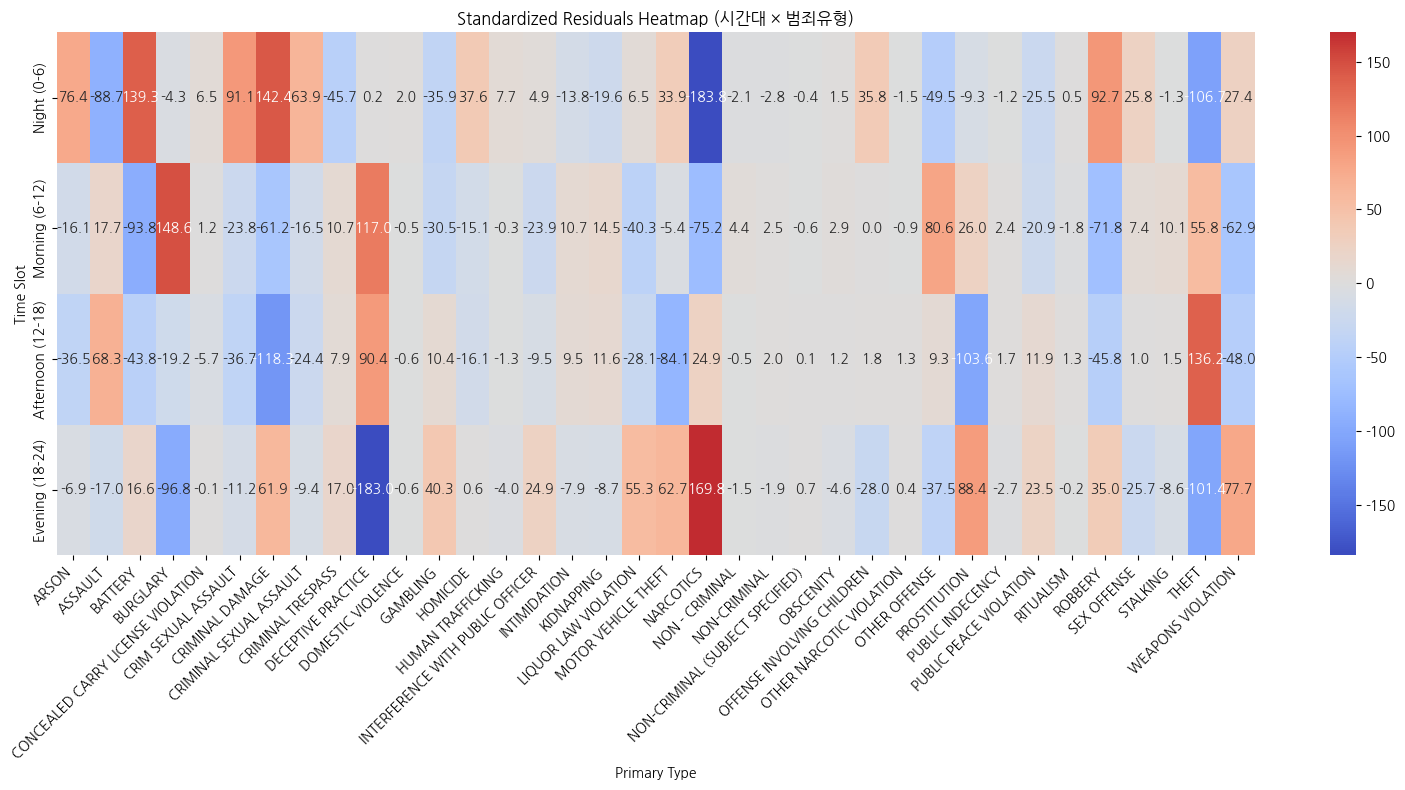

In [61]:
plt.figure(figsize=(16, 8))
sns.heatmap(standardized_residual, cmap="coolwarm", center=0, annot=True, fmt=".1f")
plt.title("Standardized Residuals Heatmap (시간대 × 범죄유형)")
plt.xlabel("Primary Type")
plt.ylabel("Time Slot")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**<결과>** <br>
Chi-squared statistic	401,824	매우 큰 값 → 관측값과 기대값의 차이가 크다<br>
p-value	0.0	0보다 훨씬 작음 → 귀무가설 강하게 기각 <br>
Degrees of freedom	105	(시간대 개수 - 1) × (범죄유형 개수 - 1)

**-> 시간대별로 범죄 유형이 다르게 나타난다.**

### 강력범죄만 필터링해서 통계분석/히트맵

In [9]:
violent_crimes = [
    "HOMICIDE", "CRIMINAL SEXUAL ASSAULT", "ROBBERY", "BATTERY", "RITUALISM",
    "ASSAULT", "BURGLARY", "THEFT", "MOTOR VEHICLE THEFT", "HUMAN TRAFFICKING", "ARSON"
]

In [67]:
# 강력범죄 리스트
violent_crimes = [
    "HOMICIDE", "CRIMINAL SEXUAL ASSAULT", "ROBBERY", "BATTERY", "RITUALISM",
    "ASSAULT", "BURGLARY", "THEFT", "MOTOR VEHICLE THEFT", "HUMAN TRAFFICKING", "ARSON"
]

# 강력범죄만 필터링
violent_df = chicago[chicago['Primary Type'].isin(violent_crimes)].copy()

# 시간 정보 추출
violent_df['Time'] = pd.to_datetime(violent_df['Time'], errors='coerce')
violent_df['Hour'] = violent_df['Time'].dt.hour

# 시간대 범주 만들기
bins = [0, 6, 12, 18, 24]
labels = ['Night (0-6)', 'Morning (6-12)', 'Afternoon (12-18)', 'Evening (18-24)']
violent_df['Time Slot'] = pd.cut(violent_df['Hour'], bins=bins, labels=labels, right=False)


In [68]:
from scipy.stats import chi2_contingency
import numpy as np

# 교차표 생성
cross_tab_violent = pd.crosstab(violent_df['Time Slot'], violent_df['Primary Type'])

# 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(cross_tab_violent)

# Cramér's V 계산
n = cross_tab_violent.values.sum()
min_dim = min(cross_tab_violent.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

# 출력
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print(f"Cramér's V: {cramers_v:.4f}")

Chi-squared statistic: 155374.65774339362
p-value: 0.0
Degrees of freedom: 30
Cramér's V: 0.1016


In [19]:
# 시간대 × 강력범죄 유형 교차표
cross_tab_violent = pd.crosstab(violent_df['Time Slot'], violent_df['Primary Type'])

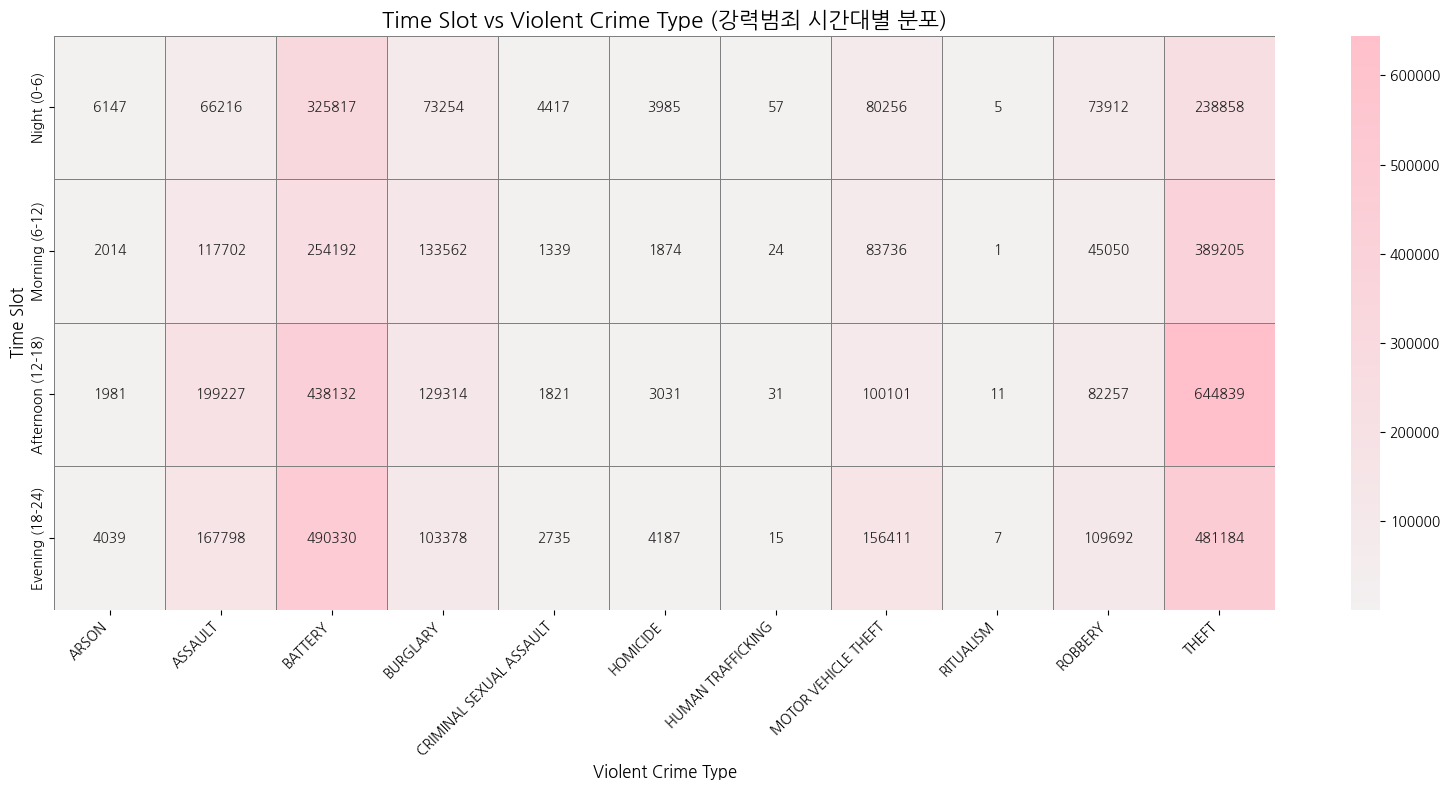

In [20]:
# 핑크 컬러맵 생성
pink_cmap = sns.light_palette("pink", as_cmap=True)

# 히트맵 그리기
plt.figure(figsize=(16, 8))
sns.heatmap(cross_tab_violent, annot=True, fmt='d', cmap=pink_cmap, linewidths=0.5, linecolor='gray')

plt.title('Time Slot vs Violent Crime Type (강력범죄 시간대별 분포)', fontsize=16)
plt.xlabel('Violent Crime Type', fontsize=12)
plt.ylabel('Time Slot', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


BATTERY와 THEFT는 모든 시간대에서 압도적으로 많고, 특히 오후(12-18시), 저녁(18-24시)에 집중

ASSAULT, ROBBERY, MOTOR VEHICLE THEFT도 오후~저녁에 많아지는 경향이 뚜렷함.

CRIMINAL SEXUAL ASSAULT, HOMICIDE는 규모는 작지만 전반적으로 야간~저녁에 분포.

야간(0-6시)에는 THEFT가 가장 많고, BATTERY도 은근히 존재함 → 이 시간대도 순찰 필요성이 있음.

      정책적으로 어떤 시간대에 어떤 유형의 범죄를 집중적으로 예방할지 설계 가능

      순찰시간 & 장소 재배치 근거로도 활용 가능

→  순찰 시간에 활용 가능

(따라서 오후~저녁 시간대에 순찰 자원을 집중적으로 배치하는 것이 효과적일 수 있다)

### 가설 1 결과

- **귀무가설(H₀)**: 시간대와 범죄 유형은 관련이 없다 (독립이다)
- **대립가설(H₁)**: 시간대와 범죄 유형은 관련이 있다 (독립이 아니다)

→ p-value 0.0 - 0보다 훨씬 작음 → 귀무가설 기각

→ Cramér's V: 0.1272 → 약한 관계가 존재한다.

      ∴❗️  χ²(105) = 401,824.31, p-value < 0.001로

          귀무가설을 기각하고 **대립가설을 채택**했습니다.

          이는 **시간대와 범죄 유형 사이에 통계적으로 유의미한 관계가 있음을** 보여줍니다.

          또한, 범주의 연관 정도를 나타내는 Cramér's V는 0.1272로

          **약한 상관관계**지만, 정책적으로 의미 있는 차이는 존재한다고 볼 수 있다.

## 가설2. 범죄 발생 장소(Location Description)에 따라 범죄 유형(Primary Type)이 달라진다

In [72]:
# 1. 결측치 제거
df = chicago[['Location Description', 'Primary Type']].dropna()

# 2. 교차표 생성
cross_tab = pd.crosstab(df['Location Description'], df['Primary Type'])

# 3. 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 4. 결과 출력
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

Chi-squared statistic: 9676208.327321418
p-value: 0.0
Degrees of freedom: 7595


In [73]:
# 전체 관측값 수
n = cross_tab.values.sum()

# 최소 차원 - 1 (행, 열 중 작은 값)
min_dim = min(cross_tab.shape) - 1

# Cramér's V 계산
cramers_v = np.sqrt(chi2 / (n * min_dim))

# 결과 출력
print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.1829


In [24]:
# top 20 장소만 필터링
top_locations = df['Location Description'].value_counts().head(20).index
df_top = df[df['Location Description'].isin(top_locations)]
cross_tab_top = pd.crosstab(df_top['Location Description'], df_top['Primary Type'])

# 다시 검정
chi2, p, dof, expected = chi2_contingency(cross_tab_top)

# 결과 출력
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

Chi-squared statistic: 5018262.186579094
p-value: 0.0
Degrees of freedom: 665


In [25]:
location_mapping = {
    '주거지': [
        'RESIDENCE', 'APARTMENT', 'HOUSE', 'ROOMING HOUSE',
        'RESIDENCE - GARAGE', 'RESIDENCE-GARAGE', 'RESIDENCE - YARD (FRONT / BACK)',
        'RESIDENCE - PORCH / HALLWAY', 'RESIDENCE PORCH/HALLWAY',
        'DRIVEWAY - RESIDENTIAL', 'GARAGE', 'COACH HOUSE'
    ],
    '상업지구': [
        'RESTAURANT', 'GROCERY FOOD STORE', 'DEPARTMENT STORE', 'SMALL RETAIL STORE', 'RETAIL STORE',
        'CONVENIENCE STORE', 'HOTEL/MOTEL', 'HOTEL', 'MOTEL', 'BANK', 'CURRENCY EXCHANGE',
        'CREDIT UNION', 'DRUG STORE', 'PAWN SHOP'
    ],
    '교통시설': [
        'STREET', 'SIDEWALK', 'PARKING LOT', 'PARKING LOT/GARAGE(NON.RESID.)',
        'HIGHWAY/EXPRESSWAY', 'EXPRESSWAY EMBANKMENT', 'ALLEY', 'TAXICAB',
        'CTA BUS', 'CTA TRAIN', 'CTA BUS STOP', 'CTA PLATFORM', 'CTA STATION',
        'CTA SUBWAY STATION', 'CTA GARAGE / OTHER PROPERTY', 'CTA PROPERTY', 'CTA TRACKS - RIGHT OF WAY',
        'VEHICLE - COMMERCIAL', 'VEHICLE - OTHER RIDE SERVICE', 'VEHICLE - DELIVERY TRUCK',
        'VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS', 'AIRPORT/AIRCRAFT',
        'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA', 'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA',
        'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA', 'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA',
        'AIRPORT PARKING LOT', 'AIRPORT TRANSPORTATION SYSTEM (ATS)'
    ],
    '공공시설': [
        'SCHOOL - PUBLIC GROUNDS', 'SCHOOL - PRIVATE BUILDING', 'SCHOOL - PUBLIC BUILDING',
        'SCHOOL, PRIVATE, GROUNDS', 'SCHOOL, PUBLIC, BUILDING', 'SCHOOL, PRIVATE, BUILDING',
        'COLLEGE / UNIVERSITY - GROUNDS', 'COLLEGE / UNIVERSITY - RESIDENCE HALL',
        'PUBLIC GRAMMAR SCHOOL', 'PUBLIC HIGH SCHOOL', 'LIBRARY', 'HOSPITAL',
        'HOSPITAL BUILDING / GROUNDS', 'MEDICAL/DENTAL OFFICE', 'POLICE FACILITY', 'GOVERNMENT BUILDING',
        'GOVERNMENT BUILDING / PROPERTY', 'FIRE STATION', 'YMCA', 'CHURCH', 'CHURCH PROPERTY',
        'CHURCH / SYNAGOGUE / PLACE OF WORSHIP', 'PARK PROPERTY', 'ATHLETIC CLUB', 'MOVIE HOUSE/THEATER',
        'SPORTS ARENA / STADIUM', 'POOL ROOM', 'BOWLING ALLEY'
    ],
    '산업시설': [
        'WAREHOUSE', 'FACTORY / MANUFACTURING BUILDING', 'FACTORY',
        'CONSTRUCTION SITE', 'JUNK YARD/GARBAGE DUMP', 'DUMPSTER',
        'GARAGE/AUTO REPAIR', 'LAUNDRY ROOM', 'LOADING DOCK',
        'COIN OPERATED MACHINE', 'ANIMAL HOSPITAL', 'FARM', 'KENNEL',
        'TRUCKING TERMINAL', 'HORSE STABLE', 'AUTO / BOAT / RV DEALERSHIP'
    ],
    '유흥시설': [
        'CASINO/GAMBLING ESTABLISHMENT', 'TAVERN / LIQUOR STORE', 'BAR OR TAVERN',
        'MOVIE HOUSE/THEATER', 'SPORTS ARENA / STADIUM', 'POOL ROOM', 'BOWLING ALLEY'
    ],
    '기타': [
        'OTHER', 'OTHER (SPECIFY)', 'UNKNOWN', 'FOREST PRESERVE', 'LAKE',
        'LAKEFRONT/WATERFRONT/RIVERBANK', 'LAGOON', 'RIVER', 'RIVER BANK',
        'SEWER', 'BEACH', 'PRAIRIE', 'WOODED AREA', 'BRIDGE'
    ]
}


In [69]:
# 장소 유형 매핑
def map_location_category(location):
    for category, loc_list in location_mapping.items():
        if location in loc_list:
            return category
    return '기타'

chicago['Location Category'] = chicago['Location Description'].apply(map_location_category)

# 결측 제거
df_loc = chicago[['Location Category', 'Primary Type']].dropna()

# 교차표 만들기
cross_tab_cat = pd.crosstab(df_loc['Location Category'], df_loc['Primary Type'])

In [71]:
from scipy.stats import chi2_contingency
import numpy as np

# 카이제곱 독립성 검정
chi2, p, dof, expected = chi2_contingency(cross_tab_cat)

# 총 관측값 수
n = cross_tab_cat.values.sum()

# Cramér's V 계산
min_dim = min(cross_tab_cat.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

# 결과 출력
print("[장소유형 × 범죄유형] 통계분석 결과")
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print(f"Cramér's V: {cramers_v:.4f}")


[장소유형 × 범죄유형] 통계분석 결과
Chi-squared statistic: 2909025.2135558305
p-value: 0.0
Degrees of freedom: 210
Cramér's V: 0.2420


<ipython-input-28-ee71b2410b8a>:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


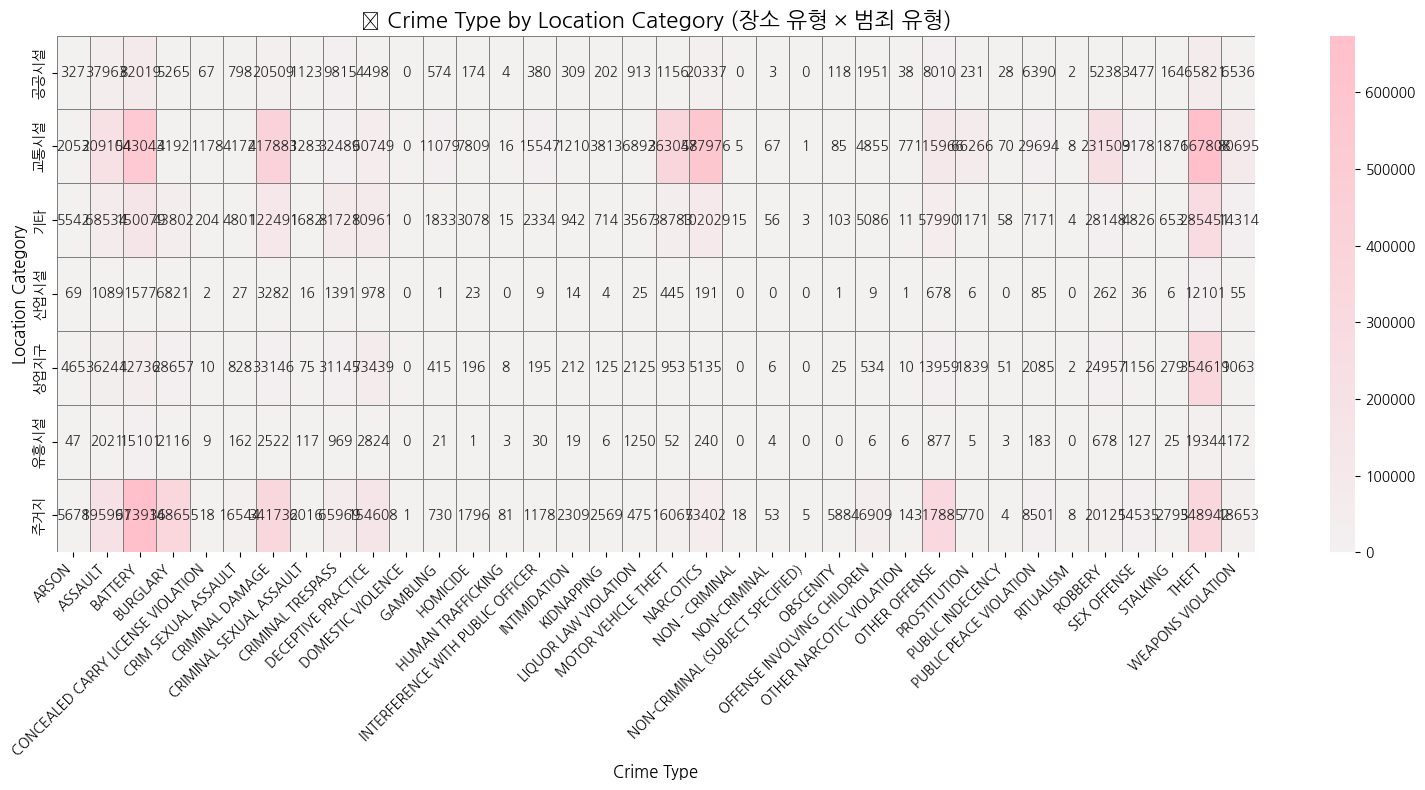

In [28]:
# 장소 유형 × 범죄 유형 교차표
cross_tab_cat = pd.crosstab(chicago['Location Category'], chicago['Primary Type'])

# 히트맵 시각화
plt.figure(figsize=(16, 8))
sns.heatmap(cross_tab_cat, annot=True, fmt='d', cmap=pink_cmap, linewidths=0.5, linecolor='gray')

plt.title('📊 Crime Type by Location Category (장소 유형 × 범죄 유형)', fontsize=16)
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Location Category', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-32-d8d2574678ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violent_df['Location Category'] = violent_df['Location Description'].apply(map_location_category)


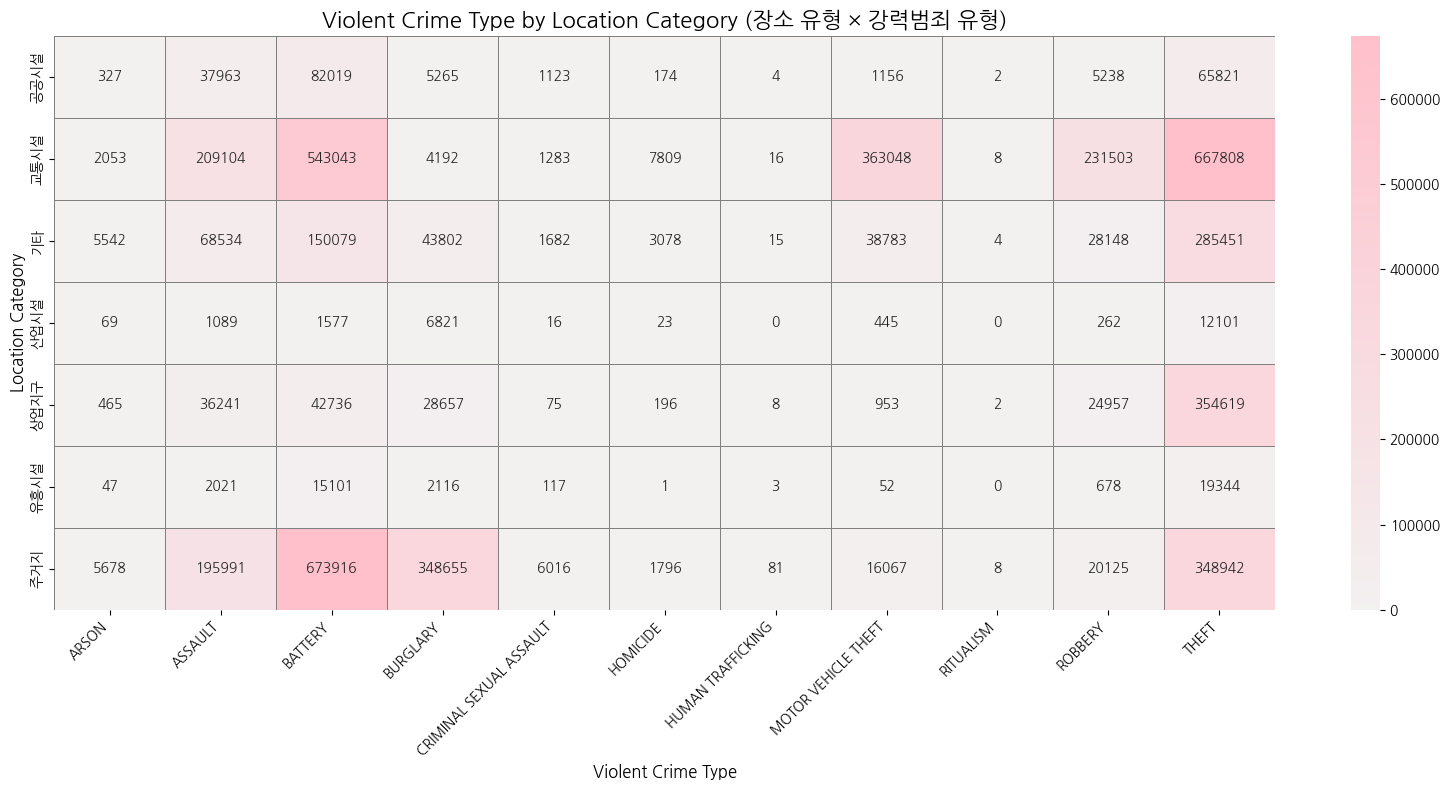

In [32]:
violent_df['Location Category'] = violent_df['Location Description'].apply(map_location_category)

# 장소유형 × 강력범죄 교차표
cross_tab_violent_cat = pd.crosstab(violent_df['Location Category'], violent_df['Primary Type'])

# 히트맵 그리기
plt.figure(figsize=(16, 8))
sns.heatmap(cross_tab_violent_cat, annot=True, fmt='d', cmap=pink_cmap, linewidths=0.5, linecolor='gray')

plt.title('Violent Crime Type by Location Category (장소 유형 × 강력범죄 유형)', fontsize=16)
plt.xlabel('Violent Crime Type', fontsize=12)
plt.ylabel('Location Category', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

| 장소 유형   | 특징적인 강력범죄 유형           | 설명                                                         |
|-------------|-------------------------------|--------------------------------------------------------------|
| 주거지      | BATTERY, BURGLARY, THEFT      | 폭행, 절도, 도난이 압도적으로 많음                         |
| 교통시설    | THEFT, ROBBERY, BATTERY       | 소매치기, 강도 등 거리에서 발생하는 범죄 빈도 높음         |
| 공공시설    | BATTERY, THEFT                | 전반적으로 건수는 낮지만 특정 범죄 유형 존재               |
| 상업지구    | THEFT, BATTERY, ASSAULT       | 상점 등에서 도난, 폭력 관련 범죄 비율 높음                |
| 기타        | BATTERY, THEFT                | 다양한 공간에서 비교적 고르게 발생하지만 폭행, 도난 중심  |


→ 상업지구에는 절도 방지를 위한 CCTV 강화, 교통시설에는 가시적 순찰 강화가 필요할 수 있음

### 가설 2 결과
(장소유형이 많아 표본이 너무 크므로 장소별로 유형을 묶어서 계산)

- **H₀ (귀무가설)**: 장소 유형(범주)과 범죄 유형은 관련이 없다 (독립이다)
- **H₁ (대립가설)**: 장소 유형에 따라 범죄 유형이 달라진다 (독립이 아니다)

→  p-value: 0.0  귀무가설을 기각하고 대립가설을 채택한다.

→ Cramér's V: 0.2420 → 약한 관계가 존재한다.


      ∴ ❗️  범죄가 발생한 장소유형을 범주로 나누어서 범죄 유형이 달라지는지를 검정한 결과,
          χ²(210) = 2,909,025.21, p-value < 0.001로
          귀무가설을 강하게 기각하고, 장소와 범죄 유형 간의 유의미한 관계를 확인했습니다.

          Cramér's V는 0.2420으로, 시간대보다 더 강한 수준의 관계를 보였습니다.


► 다른 요인들(사회적 요인 등)을 함께 고려해야 정확도가 높아질 것으로 보인다.

## 가설3. 범죄에 따라 체포율이 다르다.

In [5]:
from scipy.stats import chi2_contingency

In [6]:
# 1. 교차표 만들기: 범죄유형 × 체포여부
contingency = pd.crosstab(chicago['Primary Type'], chicago['Arrest'])

# 2. 카이제곱 독립성 검정
chi2, p, dof, expected = chi2_contingency(contingency)

# 3. 결과 출력
print(f"Chi-squared statistic: {chi2:,.2f}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")

Chi-squared statistic: 3,587,036.96
p-value: 0.0
Degrees of freedom: 35


In [8]:
import numpy as np

In [9]:
# 3. Cramér's V 계산
n = contingency.sum().sum()  # 전체 표본 수
min_dim = min(contingency.shape) - 1  # 자유도 계산용 (행 또는 열 중 더 작은 값 - 1)
cramers_v = np.sqrt(chi2 / (n * min_dim))

# 4. 결과 출력
print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.6583


범죄 유형과 체포 여부 간의 독립성을 검정하기 위해 카이제곱 검정을 실시한 결과,

χ²(35) = 3,587,036.96, p < 0.001로 귀무가설이 기각되었다.

이는 범죄 유형에 따라 체포율이 유의미하게 다르며,

특정 범죄 유형에서 체포가 특히 활발하거나 반대로 저조하게 이루어지고 있음을 시사한다.

    χ²(35) = 3,587,036.96, p < 0.001
    범죄 유형에 따라 체포율이 통계적으로 유의미하게 다르다.

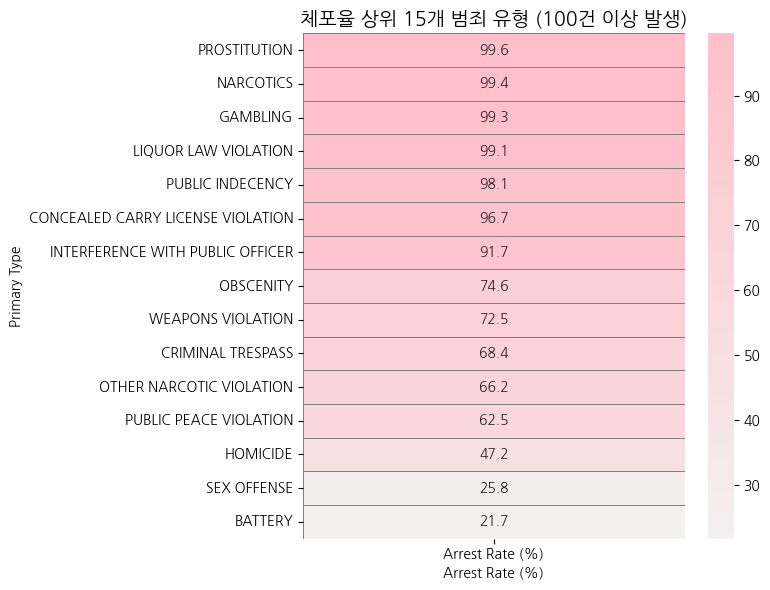

In [36]:
# Primary Type별 체포 비율 계산
arrest_ratio = chicago.groupby('Primary Type')['Arrest'].agg(['sum', 'count'])
arrest_ratio['Arrest Rate (%)'] = (arrest_ratio['sum'] / arrest_ratio['count']) * 100

# 100건 이상 발생한 범죄 유형만 필터링
arrest_filtered = arrest_ratio[arrest_ratio['count'] >= 100]

# 상위 15개 정렬
top15_arrest = arrest_filtered.sort_values('Arrest Rate (%)', ascending=False).head(15)

# 시각화를 위한 정리
top15_arrest_df = top15_arrest[['Arrest Rate (%)']]

# 핑크 컬러맵
pink_cmap = sns.light_palette("pink", as_cmap=True)

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(top15_arrest_df, annot=True, fmt=".1f", cmap=pink_cmap, linewidths=0.5, linecolor='gray')
plt.title('체포율 상위 15개 범죄 유형 (100건 이상 발생)', fontsize=14)
plt.xlabel('Arrest Rate (%)')
plt.ylabel('Primary Type')
plt.tight_layout()
plt.show()

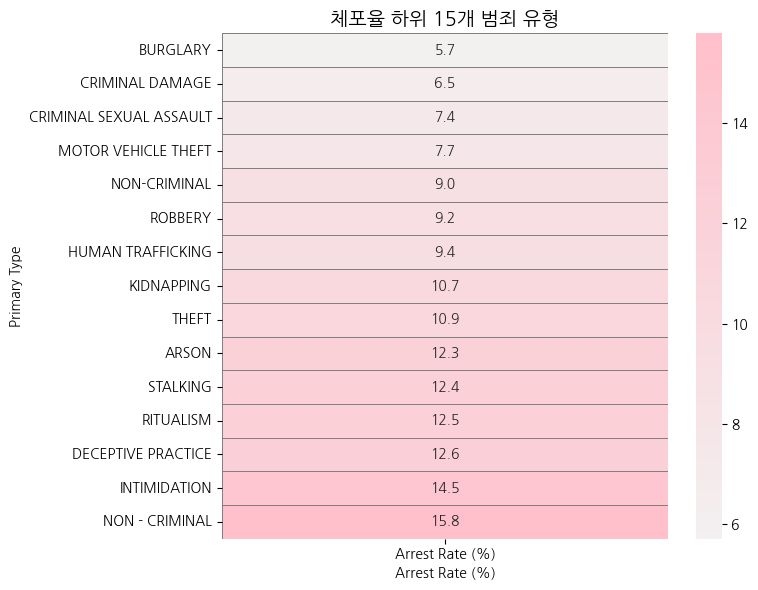

In [42]:
# 하위 5개 정렬
bottom15_arrest = arrest_ratio.sort_values('Arrest Rate (%)', ascending=True).head(15)

# 시각화를 위한 정리
bottom15_arrest_df = bottom15_arrest[['Arrest Rate (%)']]

# 핑크 컬러맵
pink_cmap = sns.light_palette("pink", as_cmap=True)

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(bottom15_arrest_df, annot=True, fmt=".1f", cmap=pink_cmap, linewidths=0.5, linecolor='gray')
plt.title('체포율 하위 15개 범죄 유형', fontsize=14)
plt.xlabel('Arrest Rate (%)')
plt.ylabel('Primary Type')
plt.tight_layout()
plt.show()

체포율 높은 범죄 유형

	대부분 공공질서 위반이나 단속이 쉬운 행위 (마약, 도박, 술법 위반 등) 중심

체포율 낮은 범죄 유형

	피해자 기반, 은밀한 장소 발생, 증거 수집 어려움 (절도, 성범죄, 차량절도 등)

* 단속 가능한 범죄에 체포율이 몰려 있다

→ 법의 눈이 쉽게 닿는 범죄만 처리되고 있는 건 아닐까?

* 주요 강력범죄의 체포율 낮음

→ 시민에게 위협이 되는 범죄에 자원이 제대로 투입되고 있는지?

**장소 유형 × 강력범죄 유형 체포율 히트맵**

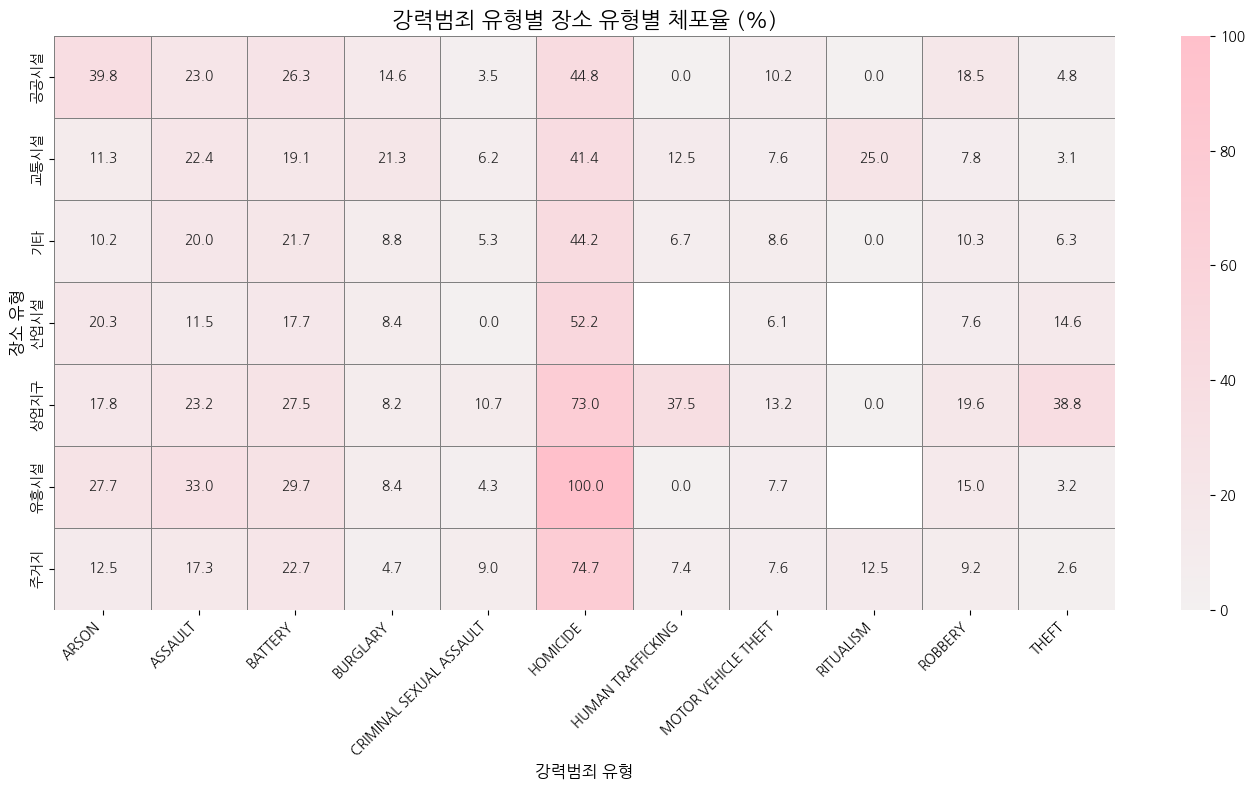

In [47]:
# 장소 유형 사전 (이전에 만든 것 사용)

# 그룹화: 범죄 유형 + 장소 카테고리
grouped_loc = violent_df.groupby(['Primary Type', 'Location Category'])['Arrest'].agg(['count', 'sum']).reset_index()
grouped_loc['Arrest Rate (%)'] = (grouped_loc['sum'] / grouped_loc['count']) * 100

# 피벗 테이블 생성
pivot_loc = grouped_loc.pivot(index='Location Category', columns='Primary Type', values='Arrest Rate (%)')

# 히트맵 시각화
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_loc, annot=True, fmt=".1f", cmap=sns.light_palette("pink", as_cmap=True), linewidths=0.5, linecolor='gray')

plt.title("강력범죄 유형별 장소 유형별 체포율 (%)", fontsize=16)
plt.xlabel("강력범죄 유형", fontsize=12)
plt.ylabel("장소 유형", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

HOMICIDE는 유흥시설(100%), 산업시설(73%), 주거지(74.7%) 등 다양한 장소에서 높은 체포율을 보임.

BURGLARY, THEFT는 거의 모든 장소에서 체포율이 낮음 (주거지 내 THEFT 체포율 2.6%)

ASSAULT, BATTERY 등 신체적 충돌 중심의 범죄는 공공시설이나 상업지구에서 비교적 체포율이 높음.

-> **장소별로 체포 가능성(수사 용이성)**이 달라질 수 있다

**시간대 × 강력범죄 유형 체포율 히트맵**

<ipython-input-49-896f8f60efed>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violent_df['Hour'] = pd.to_datetime(violent_df['Time'], errors='coerce').dt.hour
<ipython-input-49-896f8f60efed>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violent_df['Time Slot'] = violent_df['Hour'].apply(time_slot)


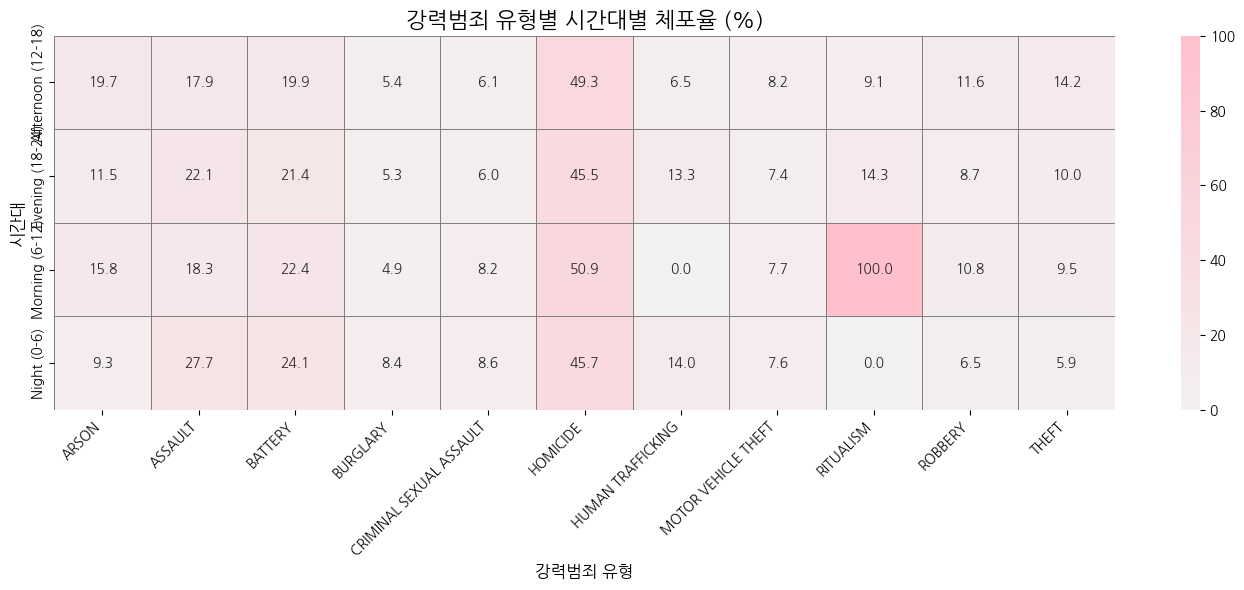

In [49]:
# 시간대 구분 함수
def time_slot(hour):
    if 0 <= hour < 6:
        return 'Night (0-6)'
    elif 6 <= hour < 12:
        return 'Morning (6-12)'
    elif 12 <= hour < 18:
        return 'Afternoon (12-18)'
    else:
        return 'Evening (18-24)'

violent_df['Hour'] = pd.to_datetime(violent_df['Time'], errors='coerce').dt.hour
violent_df['Time Slot'] = violent_df['Hour'].apply(time_slot)

# 그룹화: 범죄 유형 + 시간대
grouped_time = violent_df.groupby(['Primary Type', 'Time Slot'])['Arrest'].agg(['count', 'sum']).reset_index()
grouped_time['Arrest Rate (%)'] = (grouped_time['sum'] / grouped_time['count']) * 100

# 피벗 테이블 생성
pivot_time = grouped_time.pivot(index='Time Slot', columns='Primary Type', values='Arrest Rate (%)')

# 히트맵 시각화
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_time, annot=True, fmt=".1f", cmap=sns.light_palette("pink", as_cmap=True), linewidths=0.5, linecolor='gray')

plt.title("강력범죄 유형별 시간대별 체포율 (%)", fontsize=16)
plt.xlabel("강력범죄 유형", fontsize=12)
plt.ylabel("시간대", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- 체포율이 높은 범죄 유형
    - **PROSTITUTION, NARCOTICS, GAMBLING** 등은 체포율이 99%에 가까움
    - 이들 범죄는 **단속이 집중되거나 현장에서 적발되는 범죄**로, **체포 확률이 높음**
- 체포율이 낮은 범죄 유형(**주요 강력범죄의 체포율 낮음)
    - **BURGLARY, CRIMINAL DAMAGE, CRIMINAL SEXUAL ASSAULT** 등은 체포율이 5~15% 수준
    - 이러한 범죄는 **피해 이후 발견되거나, 피의자 추적이 어려운 경우**가 많아 체포율이 낮음

→ 체포율이 높은 범죄: 주로 **현장에서 바로 적발되는 범죄/** 낮은 범죄: **사후 발견되거나 증거 확보가 어려운 범죄**)

→ 실제로도 체포율이 매우 높은 범죄와 낮은 범죄가 뚜렷이 나뉘는 것을 확인할 수 있습니다.
    이는 범죄 유형별로 수사 난이도나 단속 가능성의 차이가 존재함을 의미합니다.
    향후 정책이나 자원배분에 유의미하게 사용될 수 있는 기초자료라고 생각합니다.

ex) 체포율이 낮은 범죄 유형에 대한 전담 수사 인력 강화 또는 신고 시스템 개선 요구

### 가설 3 결과

- 귀무가설(H₀) :  범죄 유형과 체포 여부는 서로 독립적이다.
- 대립가설(H₁) : 범죄 유형과 체포 여부는 서로 관련이 있다.

→  p-value: 0.0  귀무가설을 기각하고 대립가설을 채택한다.

→ Cramér's V:  0.6583 → 강한 관계가 존재한다. (범죄 유형에 따라 체포율이 매우 달라진다)


      ∴ ❗️범죄 유형과 체포 여부 간의 독립성을 검정하기 위해 카이제곱 검정을 실시한 결과,

        χ²(35) = 3,587,036.96, p < 0.001로 귀무가설을 기각하고 범죄 유형과 체포율 간의 유의미한 관계를 확인했습니다.

        특히 **Cramér’s V = 0.6 이상**으로, 이는**두 변수 간 매우 강한 상관관계**를 의미합니다.

### 가설 3 로지스틱 회귀 분석

In [10]:
import pandas as pd
import statsmodels.formula.api as smf

In [11]:
# Arrest는 True/False → 숫자로 바꿔
# 결측치 제거
logit_df = chicago[['Primary Type', 'Arrest']].dropna().copy()
logit_df['Arrest'] = logit_df['Arrest'].astype(int)

범죄 유형(Primary Type)에 따라 체포 여부(Arrest)가 달라지는가?"

종속변수: Arrest → 0 또는 1 (0: 체포 안 됨, 1: 체포됨) -> 이항분류

독립변수: Primary Type → 범죄 유형 (범주형 변수)



In [14]:
model = smf.logit("Arrest ~ C(Q('Primary Type'))", data=logit_df).fit()

         Current function value: 0.357277
         Iterations: 35


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


- 여기서 기준은 **THEFT (절도)**입니다. (빈도수가 가장 높아 자동설정됨)

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Arrest   No. Observations:              8276672
Model:                          Logit   Df Residuals:                  8276636
Method:                           MLE   Df Model:                           35
Date:                Tue, 01 Apr 2025   Pseudo R-squ.:                  0.3694
Time:                        08:08:30   Log-Likelihood:            -2.9571e+06
converged:                      False   LL-Null:                   -4.6896e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================================================
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                    -1.9651      0.026    -76.836      0.000      -2.015      -1.915
C(Q('Primary Type'))[T.ASSAULT]                               0.6044      0.026     23.433      0.000       0.554       0.655
C(Q('Primary Type'))[T.BATTERY]                               0.6824      0.026     26.600      0.000       0.632       0.733
C(Q('Primary Type'))[T.BURGLARY]                             -0.8382      0.026    -31.764      0.000      -0.890      -0.786
C(Q('Primary Type'))[T.CONCEALED CARRY LICENSE VIOLATION]     5.3450      0.148     36.237      0.000       5.056       5.634
C(Q('Primary Type'))[T.CRIM SEXUAL ASSAULT]                   0.3042      0.030      9.991      0.000       0.244       0.364
C(Q('Primary Type'))[T.CRIMINAL DAMAGE]                      -0.6953      0.026    -26.832      0.000      -0.746      -0.645
C(Q('Primary Type'))[T.CRIMINAL SEXUAL ASSAULT]              -0.5604      0.045    -12.323      0.000      -0.649      -0.471
C(Q('Primary Type'))[T.CRIMINAL TRESPASS]                     2.7378      0.026    105.393      0.000       2.687       2.789
C(Q('Primary Type'))[T.DECEPTIVE PRACTICE]                    0.0243      0.026      0.931      0.352      -0.027       0.075
C(Q('Primary Type'))[T.DOMESTIC VIOLENCE]                    17.9088   2898.123      0.006      0.995   -5662.307    5698.125
C(Q('Primary Type'))[T.GAMBLING]                              6.8868      0.101     68.335      0.000       6.689       7.084
C(Q('Primary Type'))[T.HOMICIDE]                              1.8523      0.031     59.753      0.000       1.792       1.913
C(Q('Primary Type'))[T.HUMAN TRAFFICKING]                    -0.2949      0.304     -0.969      0.333      -0.892       0.302
C(Q('Primary Type'))[T.INTERFERENCE WITH PUBLIC OFFICER]      4.3653      0.036    120.115      0.000       4.294       4.437
C(Q('Primary Type'))[T.INTIMIDATION]                          0.1873      0.048      3.934      0.000       0.094       0.281
C(Q('Primary Type'))[T.KIDNAPPING]                           -0.1613      0.045     -3.548      0.000      -0.250      -0.072
C(Q('Primary Type'))[T.LIQUOR LAW VIOLATION]                  6.6250      0.088     75.434      0.000       6.453       6.797
C(Q('Primary Type'))[T.MOTOR VEHICLE THEFT]                  -0.5235      0.026    -19.962      0.000      -0.575      -0.472
C(Q('Primary Type'))[T.NARCOTICS]                             7.0338      0.029    239.003      0.000       6.976       7.091
C(Q('Primary Type'))[T.NON - CRIMINAL]                        0.2912      0.446      0.653      0.513      -0.582       1.165
C(Q('Primary Type'))[T.NON-CRIMINAL]                         -0.3491      0.256     -1.366      0.172      -0.850       0.152
C(Q('Primary Type'))[T.NON-CRIMINAL (SUBJECT SPECIFIED)]      1.2720      0.708      1.798 

**Domestic Violence, Ritualism 같은 일부 항목은 표본 수가 너무 적거나 계산이 불안정**

► 체포 확률이 높은 범죄유형 (coef 양수)

| 범죄 유형                    | 계수 (coef) | 해석                                  |
|-----------------------------|-------------|----------------------------------------|
| PROSTITUTION                | 7.42        | 체포 확률 매우 높음 (현장 적발 가능성) |
| NARCOTICS                   | 7.03        | 마약 → 강력 단속 대상                  |
| GAMBLING                    | 6.88        | 불법 도박도 고확률 체포               |
| LIQUOR LAW VIOLATION        | 6.62        | 주류 위반도 단속 중심                 |
| WEAPONS VIOLATION           | 2.93        | 체포 확률 매우 높음                   |
| PUBLIC PEACE VIOLATION      | 2.47        | 공공질서 위반 → 즉각 체포 가능성 ↑    |

➔ 즉시 단속 가능한 범죄라는 점에서 체포율이 높게 나옴


► 체포 확률이 낮은 범죄유형 (coef 음수)

| 범죄 유형             | coef       | 해석                               |
|----------------------|------------|------------------------------------|
| BURGLARY             | -0.84      | 침입절도, 현장 체포 어려움         |
| CRIMINAL DAMAGE      | -0.69      | 재산 손괴는 사후 신고 많음         |
| ROBBERY              | -0.32      | 강도도 체포율 낮음 (현장 이탈 가능성) |
| MOTOR VEHICLE THEFT  | -0.52      | 차량 절도, 추적 어려움             |
| THEFT                | (기준 그룹) | 비교 기준으로 쓰임                 |



➔ 이런 범죄들은 현장에서 바로 체포하기 어렵고,
피해 신고 이후 수사로 이어지는 경우가 많아 체포율이 낮은 편

로지스틱 회귀 분석 결과, 범죄 유형은 체포 여부에 매우 큰 영향을 미치는 변수로 나타났습니다.

PROSTITUTION, NARCOTICS, GAMBLING 등은 THEFT에 비해 체포 확률이 훨씬 높았고,

BURGLARY, CRIMINAL DAMAGE, ROBBERY 등은 상대적으로 체포 확률이 낮게 나타났습니다.

이러한 차이는 범죄의 특성, 현장 단속 가능성, 신고 타이밍 등에 기인하는 것으로 볼 수 있으며,

범죄유형별 수사 전략 차별화의 근거 자료로 활용될 수 있습니다.

In [16]:
# 1. 로지스틱 회귀 결과를 데이터프레임으로 정리
results_df = pd.DataFrame({
    'coef': model.params,
    'std err': model.bse,
    'z': model.tvalues,
    'p-value': model.pvalues
})

# 2. 신뢰구간 추가
conf = model.conf_int()
results_df['[0.025'] = conf[0]
results_df['0.975]'] = conf[1]

# 3. index 정리: Primary Type만 남기기
results_df = results_df.reset_index().rename(columns={'index': 'Variable'})
results_df = results_df[results_df['Variable'].str.contains("Primary Type")]

# 4. 범죄유형 이름만 추출
results_df['Primary Type'] = results_df['Variable'].str.extract(r"C\(Q\('Primary Type'\)\)\[T\.(.*)\]")

# 5. 정리된 결과 확인
results_df = results_df[['Primary Type', 'coef', 'std err', 'z', 'p-value', '[0.025', '0.975]']]
results_df.head()


,Primary Type,coef,std err,z,p-value,[0.025,0.975]
1,ASSAULT,0.604414,0.025793,23.432970,1.971897e-121,0.553860,0.654968
2,BATTERY,0.682353,0.025652,26.600436,6.709741e-156,0.632076,0.732630
3,BURGLARY,-0.838201,0.026388,-31.763889,2.041863e-221,-0.889921,-0.786481
4,CONCEALED CARRY LICENSE VIOLATION,5.345032,0.147503,36.236703,1.609576e-287,5.055931,5.634133
5,CRIM SEXUAL ASSAULT,0.304163,0.030444,9.990780,1.672598e-23,0.244493,0.363833


In [22]:
# 체포 확률 높은 범죄 TOP5
top5 = results_df[results_df['p-value'] < 0.05].sort_values(by='coef', ascending=False).head(5)

# 체포 확률 낮은 범죄 TOP5 (p-value < 0.05인 유의한 것만)
bottom5 = results_df[results_df['p-value'] < 0.05].sort_values(by='coef').head(5)

<ipython-input-23-8f92fe1ec1e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5, x='Primary Type', y='coef', palette='pink')


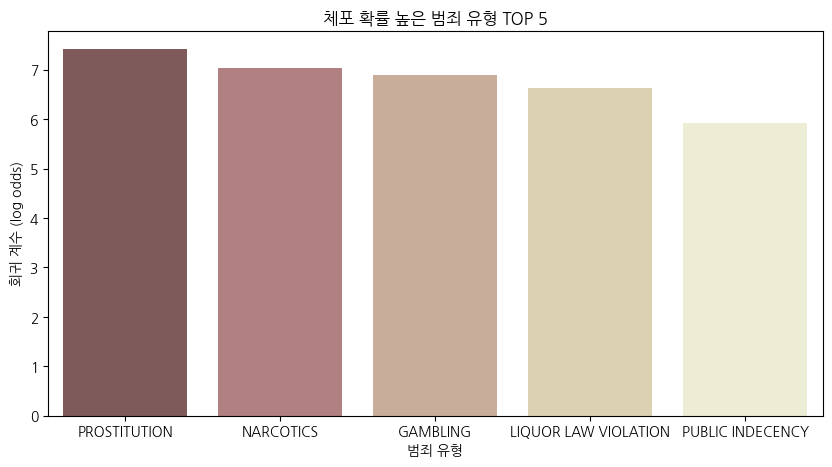

<ipython-input-23-8f92fe1ec1e8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom5, x='Primary Type', y='coef', palette='Blues_r')


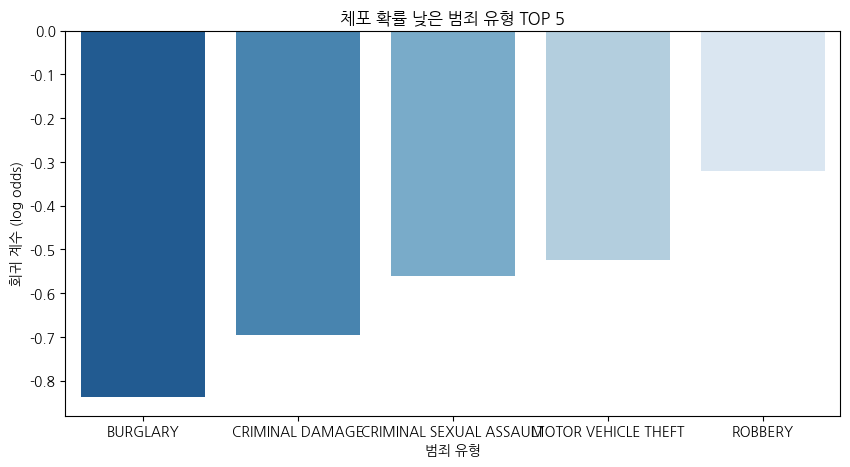

In [23]:
# 체포 확률 높은 범죄
plt.figure(figsize=(10, 5))
sns.barplot(data=top5, x='Primary Type', y='coef', palette='pink')
plt.title('체포 확률 높은 범죄 유형 TOP 5')
plt.ylabel('회귀 계수 (log odds)')
plt.xlabel('범죄 유형')
plt.show()

# 체포 확률 낮은 범죄
plt.figure(figsize=(10, 5))
sns.barplot(data=bottom5, x='Primary Type', y='coef', palette='Blues_r')
plt.title('체포 확률 낮은 범죄 유형 TOP 5')
plt.ylabel('회귀 계수 (log odds)')
plt.xlabel('범죄 유형')
plt.show()